# Rating Based Recommendation

### Importing packages and data

In [37]:
import numpy as np
import pandas as pd
import sklearn
from scipy import sparse
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import random
import copy
sns.set_style('whitegrid')
#matplotlib inline

In [61]:
ratings = pd.read_csv (r'./../data/ratings.csv')
movies = pd.read_csv (r'./../data/movies.csv')
movies_metadata = pd.read_csv (r'./../data/movies_metadata.csv')bbbb

### Viewing data

In [41]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [55]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Creating table with movieId total count of ratings for each movie id

In [43]:
rating_info = pd.DataFrame(ratings.groupby('movieId')['rating'].mean())
rating_info['count'] = pd.DataFrame(ratings.groupby('movieId')['rating'].count())
rating_info.head()

,rating,count
movieId,,
1,3.920930,215
2,3.431818,110
3,3.259615,52
4,2.357143,7
5,3.071429,49


### Analyzing data by viewing graphs
checking if suitable for correlation

<AxesSubplot:>

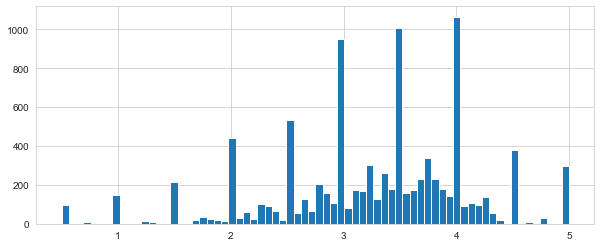

In [44]:
plt.figure(figsize=(10,4))
rating_info['rating'].hist(bins=70)

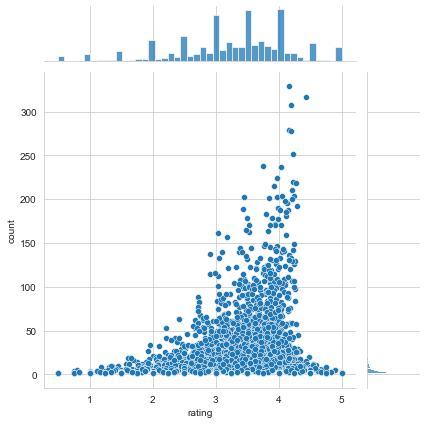

In [45]:
sns.jointplot(x='rating', y='count', data=rating_info)

Ratings are rudimentarily normally distributed 
* therefore correlation is applicable

### Creating pivot table with ratings for each movie from each user

In [46]:
rating_pivot = pd.pivot_table(ratings, index='userId', columns='movieId', values='rating')
rating_pivot.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Saving pivot_table to save calculation time

In [16]:
#rating_pivot.to_csv(r'..\pivot_table.csv')

## Actual recommendation algorithm

### Main function

In [47]:
def recommendation(movie_id):
    #calculating correlation to other users
    correlation = rating_pivot.corrwith(rating_pivot[movie_id])
    #creating table
    corr_movie = pd.DataFrame(correlation, columns=['correlation'])
    #dropping movies non values => no correlation
    corr_movie.dropna(inplace=True)
    #adding total count of ratings for each movie to the table
    corr_movie = corr_movie.join(rating_info['count'])
    #listing movies by correlation score and just using movies with more then the 90th percentile of the total count of ratings per movie
    cutoff = rating_info['count'].quantile(0.90)
    corr_movie = corr_movie[corr_movie['count']>cutoff].sort_values('correlation', ascending=False)
    #deleting movie that the recommendation is based on from recommendation list
    if movie_id in corr_movie.index:
        corr_movie = corr_movie.drop([movie_id])
    #changing index to ranking and movieId to column
    corr_movie['movieId'] = corr_movie.index
    corr_movie = corr_movie.set_index(pd.Index(list(range(len(corr_movie)))))
    return corr_movie

### Inititializing recommendation with ids 11, 15, 18

In [59]:
movie_ids = [3795, 3514, 62113, 173963, 6557, 71268]
rec_movies_list = []
rec_movies_dict = {}
for i in movie_ids:
    rec = recommendation(i)
    #skip if no correlating movies
    if rec.empty:
        continue
    #adding top 5 recommended movies to array 
    for k in range(5):
        rec_movies_list.append(int(rec.iloc[k].array[2]))
    #counting top recommended movies
    rec_count = collections.Counter(rec_movies_list)
    #adding top 5 recommended movies to array 
    for k in range(5):
        rec_movies_dict[int(rec.iloc[k][2])] = rec.iloc[k][0]
        
print(sorted(rec_movies_final, key=rec_movies_final.get, reverse=True)[:10])

c:\python39\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\python39\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
c:\python39\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\python39\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
c:\python39\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\python39\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
c:\python39\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of free

NameError: name 'rec_movies_final' is not defined

In [57]:
recommendation(11).head()

c:\python39\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\python39\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,correlation,count,movieId
0,1.0,28,74789
1,1.0,33,8957
2,1.0,32,68237
3,1.0,35,3409
4,1.0,30,84152


In [53]:
#creating table with movieId total count of ratings for each movie id
rating_info = pd.DataFrame(ratings.groupby('movieId')['rating'].mean())
rating_info['count'] = pd.DataFrame(ratings.groupby('movieId')['rating'].count())

#main algorithm function
def recommendation(movie_id):
    #calculating correlation to other users
    correlation = rating_pivot.corrwith(rating_pivot[movie_id])
    #creating table
    corr_movie = pd.DataFrame(correlation, columns=['correlation'])
    #dropping movies non values => no correlation
    corr_movie.dropna(inplace=True)
    #adding total count of ratings for each movie to the table
    corr_movie = corr_movie.join(rating_info['count'])
    #listing movies by correlation score and just using movies with more then the 90th percentile of the total count of ratings per movie
    cutoff = rating_info['count'].quantile(0.90)
    corr_movie = corr_movie[corr_movie['count']>cutoff].sort_values('correlation', ascending=False)
    #deleting movie that the recommendation is based on from recommendation list
    if movie_id in corr_movie.index:
        corr_movie = corr_movie.drop([movie_id])
    #changing index to ranking and movieId to column
    corr_movie['movieId'] = corr_movie.index
    corr_movie = corr_movie.set_index(pd.Index(list(range(len(corr_movie)))))
    return corr_movie

def multi_recommendation(movie_ids):
    #function to get recommendation as an array of titles for multiple inputs  

    rec_movies_list = []
    rec_movies_dict = {}

    for i in movie_ids:
        rec = recommendation(i)
        #skip if no correlating movies
        if rec.empty:
            continue
        #adding top 5 recommended movies to array 
        for k in range(5):
            rec_movies_list.append(int(rec.iloc[k].array[2]))
        #counting top recommended movies
        rec_count = collections.Counter(rec_movies_list)
        #adding top 5 recommended movies to array 
        for k in range(5):
            rec_movies_dict[int(rec.iloc[k][2])] = rec.iloc[k][0]
    
    #creating new score: count*correlation
    rec_movies_final = copy.deepcopy(rec_count) 
    for k in rec_count:
        rec_movies_final.update({k: rec_count.get(k) * rec_movies_dict.get(k) - rec_count.get(k)})
    
    return sorted(rec_movies_final, key=rec_movies_final.get, reverse=True)[:10]

In [52]:
c = multi_recommendation([11, 32])

c:\python39\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\python39\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
c:\python39\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\python39\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [54]:
c

[74789, 8957, 68237, 3409, 84152, 5673, 111362, 99114, 3499, 60040]

In [304]:
rec_movies_final = copy.deepcopy(rec_count) 
#combining
for k in rec_count:
    rec_movies_final.update({k: rec_count.get(k) * rec_movies_dict.get(k) - rec_count.get(k)})
    print(k, ':', rec_count.get(k), '*', rec_movies_dict.get(k), '=', rec_count.get(k) * rec_movies_dict.get(k))

rec_movies_ids = sorted(rec_movies_final, key=rec_final.get, reverse=True)[:10]

74789 : 1 * 1.0 = 1.0
8957 : 1 * 1.0 = 1.0
68237 : 1 * 1.0 = 1.0
3409 : 1 * 1.0 = 1.0
84152 : 1 * 0.9999999999999999 = 0.9999999999999999
134130 : 1 * 1.0 = 1.0
3793 : 1 * 1.0 = 1.0
52973 : 1 * 1.0 = 1.0
4018 : 1 * 1.0 = 1.0
54286 : 1 * 1.0 = 1.0
152081 : 1 * 1.0 = 1.0
3681 : 1 * 1.0 = 1.0
74458 : 1 * 1.0 = 1.0
61024 : 1 * 1.0 = 1.0
2871 : 1 * 1.0 = 1.0


In [323]:
rec_movies_titles = []
for i in rec_movies_ids:
    rec_movies_titles.append(movies_metadata.loc[movies_metadata['movieId'] == int(i), 'title'].array)
for i in rec_movies_titles:
    #if clause was used to determine wether the movieId was in metadata_set
    if not i:
        print('empty')
    else:
        print(i[0])

Alice in Wonderland (2010)
Saw (2004)
Moon (2009)
Final Destination (2000)
The Martian (2015)
X-Men (2000)
Knocked Up (2007)
What Women Want (2000)
Bourne Ultimatum, The (2007)
Zootopia (2016)


### Testing for web app (random movie ids)

In [324]:
movies_id = movies.loc[:,'movieId'].array
#choosing 10 random movieIds from collection
random_ids = []
for i in range(10):
    random_ids.append(random.choice(movies.loc[:,'movieId'].array))
movie_selection = []
for i in random_ids:
    movie_selection.append(movies.loc[movies['movieId'] == int(i), 'title'].array[0])
print(movie_selection)

['Billy Liar (1963)', 'South Pacific (1958)', 'Fourth Protocol, The (1987)', 'Edmond (2005)', 'Dragonheart (1996)', 'Cocoanuts, The (1929)', 'Wonder Wheel (2017)', 'Stoning of Soraya M., The (2008)', 'Battle Royale 2: Requiem (Batoru rowaiaru II: Chinkonka) (2003)', 'Howling, The (1980)']


### Checking if rating ids in metadata
(not exacutable since data is not imported anymore)

In [205]:
from IPython.display import clear_output

not_in_meta_small = []
in_meta_small = []
a=1
length = str(len(ratings_small.movieId))

for i in ratings_small.movieId:
    clear_output(wait=True)
    print(str(a)+'/'+length)
    a+=1
    if not movies_metadata.loc[movies_metadata['id'] == str(i), 'original_title'].array:
        not_in_meta_small.append(i)
    else:
        in_meta_small.append(i)  
        
print('ratings_small:')
print('Not in:', len(not_in_meta_small))
print('In:', len(in_meta_small))

100004/100004
ratings_small:
Not in: 55015
In: 44989


#### Output:
ratings_small:
Not in: 55015<br>
In: 44989<br>

In [206]:
from IPython.display import clear_output

a=1
length = str(len(ratings.movieId))
not_in_meta = []
in_meta = []

for i in ratings.movieId:
    clear_output(wait=True)
    print(str(a)+'/'+length)
    a+=1
    if not movies_metadata.loc[movies_metadata['id'] == str(i), 'original_title'].array:
        not_in_meta.append(i)
    else:
        in_meta.append(i)
        
print('ratings:')     
print('Not in: ', len(not_in_meta))
print('In: ', len(in_meta))

26024289/26024289
ratings:
Not in:  14587721
In:  11436568


#### Output:
ratings:<br>
Not in:  14587721<br>
In:  11436568<br>

In [211]:
from numpy import asarray
from numpy import savetxt
# define data
data = asarray(not_in_meta_small)
# save to csv file
savetxt('not_in_meta_small.csv', data, delimiter=',')

In [216]:
with open("not_in_meta_small.txt", "w") as output:
    output.write(str(not_in_meta_small))

with open("in_meta_small.txt", "w") as output:
    output.write(str(in_meta_small)) 
    
with open("not_in_meta.txt", "w") as output:
    output.write(str(not_in_meta))

with open("in_meta.txt", "w") as output:
    output.write(str(in_meta))

In [217]:
def get_missing_ids(list):
    list_count = collections.Counter(list)
    return sorted(list_count, key=list_count.get, reverse=True)

In [220]:
print('Small:')
print('Not in meta:', len(get_missing_ids(not_in_meta_small)))
print('In meta:', len(get_missing_ids(in_meta_small)))
print('Big:')
print('Not in meta:', len(get_missing_ids(not_in_meta)))
print('In meta:', len(get_missing_ids(in_meta)))

Small:
Not in meta: 6236
In meta: 2830
Big:
Not in meta: 37550
In meta: 7565


#### Output
Small:<br>
Not in meta: 6236<br>
In meta: 2830<br>
Big:<br>
Not in meta: 37550<br>
In meta: 7565<br>